# Examining Influential Factors on Poverty Status
## Clustering
---

## Table of Contents:
- [Preprocessing](#p)
- [Numerical Clustering](#n)
- [Categorical Clustering](#cc)
- [Conclusion](#c)

In [2]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

pd.set_option('display.max_columns', None)

#KMeans warnings
import warnings
warnings.filterwarnings('ignore')

In [149]:
#import data
df = pd.read_csv("https://media.githubusercontent.com/media/Rpierre98/DSI-320-Group-Project/main/data/clean_data/cleaned_data.csv")

### Preprocessing<a id='p'></a>

In [150]:
#change variable values for better visualization interpretation
df = df.replace({'POV_STS' : { 1 : 'in poverty', 0 : 'not in poverty'}})

In [151]:
#create list of numeric columns
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
numeric_columns

['AGE',
 'OUT_POCKET_NONPREM',
 'OUT_POCKET_OC',
 'WEEKS_WRK',
 'GROSS_PAY',
 'EARN_TOTAL',
 'TOTAL_DIS_INC',
 'TIME_ASSIST',
 'CHLD_SUP',
 'ADJ_GROSS_INC']

In [7]:
#create list of categorical columns
categorical_columns = df.select_dtypes(include='object').columns.tolist()
categorical_columns

['STATE',
 'FAM_RELATIONSHIP',
 'OCCUPATION',
 'EDU_LVL',
 'MARITAL',
 'SEX',
 'HOUSEHOLD_SUMMARY',
 'MILITARY',
 'CERT_REQ',
 'TROUB_BATHE',
 'TROUB_HEAR',
 'TROUB_SEE',
 'TROUB_ALONE',
 'TROUB_WALK',
 'TROUB_CONC',
 'HISPANIC',
 'IMMIGR_YR',
 'CITIZENSHIP',
 'DISABLED',
 'RACE',
 'WORK_INDUSTRY',
 'LABOR_STATUS',
 'WRK_STATUS',
 'WRK_CLASS_LONGEST',
 'LONGEST_IND',
 'NO_WRK_RSN',
 'FT_PT',
 'EARN_SOURCE',
 'ERN_OTR',
 'WORK_DIS',
 'DIS_INC',
 'OTH_DIS_INC',
 'FIN_ASSIST',
 'OTH_INC',
 'CASH_ASSIST',
 'WIC',
 'TAX_FILE_STAT',
 'HEALTH_INS',
 'PUB_INS',
 'PRIV_INS',
 'POV_STS',
 'POV_LVL']

In [152]:
#only clustering people in poverty
df = df.loc[df["POV_STS"] == 'in poverty']

In [153]:
#select features for clustering
X = df[['FAM_RELATIONSHIP', 'OCCUPATION', 'EDU_LVL', 'MARITAL', 'SEX','MILITARY', 'HISPANIC', 'IMMIGR_YR',
        'CITIZENSHIP', 'DISABLED','RACE', 'WORK_INDUSTRY', 'LABOR_STATUS', 'WRK_STATUS', 'NO_WRK_RSN',
        'FT_PT', 'EARN_SOURCE', 'ERN_OTR', 'WORK_DIS', 'TAX_FILE_STAT','HEALTH_INS', 'PUB_INS', 'PRIV_INS',
         'WEEKS_WRK', 'AGE', 'EARN_TOTAL', 'ADJ_GROSS_INC','OUT_POCKET_NONPREM', 'OUT_POCKET_OC', 'POV_STS']]

In [156]:
#scale appropriate numeric features
ctx = ColumnTransformer([
    ('ss', StandardScaler(), ['WEEKS_WRK', 'AGE', 'EARN_TOTAL', 'ADJ_GROSS_INC',
                              'OUT_POCKET_NONPREM', 'OUT_POCKET_OC'])],
    verbose_feature_names_out = False, remainder='passthrough')

In [157]:
#transform data and place in dataframe
X_transformed = ctx.fit_transform(X)
X_transformed = pd.DataFrame(X_transformed,columns = ctx.get_feature_names_out())

In [158]:
#check transformed data
X_transformed.head()

,WEEKS_WRK,AGE,EARN_TOTAL,ADJ_GROSS_INC,OUT_POCKET_NONPREM,OUT_POCKET_OC,FAM_RELATIONSHIP,OCCUPATION,EDU_LVL,MARITAL,SEX,MILITARY,HISPANIC,IMMIGR_YR,CITIZENSHIP,DISABLED,RACE,WORK_INDUSTRY,LABOR_STATUS,WRK_STATUS,NO_WRK_RSN,FT_PT,EARN_SOURCE,ERN_OTR,WORK_DIS,TAX_FILE_STAT,HEALTH_INS,PUB_INS,PRIV_INS,POV_STS
0,-0.497299,0.842209,-0.344988,-0.128571,-0.158948,-0.375443,ref person,none,high school graduate,widowed,female,no,no,not immigrant,native,no,White only,Not applicable,retired,Not in labor force,retired,nonworker,unemployed,under 15,no,nonfiler,yes,covered all year,covered all year,in poverty
1,-0.497299,0.967997,-0.344988,-0.128571,-0.158948,-0.375443,other relatives,none,high school graduate,widowed,female,no,no,not immigrant,native,no,White only,Not applicable,retired,Not in labor force,retired,nonworker,unemployed,under 15,no,nonfiler,yes,covered all year,covered all year,in poverty
2,-0.497299,1.722729,-0.344988,-0.128571,-0.139504,-0.315958,not fam,none,high school graduate,widowed,female,no,no,not immigrant,native,yes,White only,Not applicable,retired,Not in labor force,retired,nonworker,unemployed,under 15,no,single,yes,covered all year,no coverage,in poverty
3,-0.497299,1.303433,-0.344988,-0.123857,0.424372,2.717778,not fam,none,doctorate degree,single,male,yes,no,not immigrant,native,no,White only,Not applicable,retired,Not in labor force,retired,nonworker,unemployed,under 15,yes,single,yes,covered all year,covered all year,in poverty
4,-0.497299,-0.247959,-0.344988,-0.128571,-0.158948,-0.256473,ref person,office,college no degree,single,female,no,no,not immigrant,native,no,White only,Public administration,unemployed,Unemployed FT,taking care of home,nonworker,unemployed,under 15,no,head of HH,yes,covered all year,no coverage,in poverty


In [159]:
#split data for KMeans and KModes Clustering
X_num = X_transformed[['WEEKS_WRK', 'AGE', 'EARN_TOTAL', 'ADJ_GROSS_INC','OUT_POCKET_NONPREM', 'OUT_POCKET_OC']]
X_cat = X_transformed.drop(columns = ['WEEKS_WRK', 'AGE', 'EARN_TOTAL', 'ADJ_GROSS_INC','OUT_POCKET_NONPREM',
                                      'OUT_POCKET_OC'])

### Helper Function

In [ ]:
plot_list = ["OCCUPATION", 'EDU_LVL', 'MARITAL', 'DISABLED', 'SEX', 'CITIZENSHIP', 
            'RACE', 'LABOR_STATUS', 'HEALTH_INS', 'PUB_INS', 'PRIV_INS','FAM_RELATIONSHIP',
            'WORK_INDUSTRY', 'NO_WRK_RSN', 'DIS_INC', 'TAX_FILE_STAT']

In [78]:
#create custom frequency bar plots comparing chosen variable values with POV_STS = "in poverty"
def custom_frequency_plot(cluster, variable, color = "orange", df = df):
    df_1 = df.loc[(df['POV_STS'] == 'in poverty') & (df['kmodes_cluster'] == cluster)]
    fig, ax =  plt.subplots(1, 1, figsize=(6,6))
    
    sns.barplot(x=df_1[variable].value_counts().index, y = df_1[variable].value_counts\
                  (normalize = True),color = color, alpha = 0.75,
              order=df_1[variable].value_counts(ascending=True).index)
    ax.tick_params(rotation=90)
    ax.set_title(f"{variable} - In Poverty", fontweight = 'bold')
    ax.set_xlabel("Category")
    ax.set_ylabel("Frequency")
    
    plt.subplots_adjust(wspace=.4)
    plt.tight_layout()
    #plt.savefig(f'../images/{variable}_frequency.png');

## Numerical Clustering<a id='n'></a>
---

In [162]:
#convert numerical columns back to float after transfromation
X_num = X_num.astype({'WEEKS_WRK':'float','AGE':'float',
                                     'EARN_TOTAL':'float','ADJ_GROSS_INC':'float',
                                     'OUT_POCKET_NONPREM':'float','OUT_POCKET_OC':'float'})

### KMeans

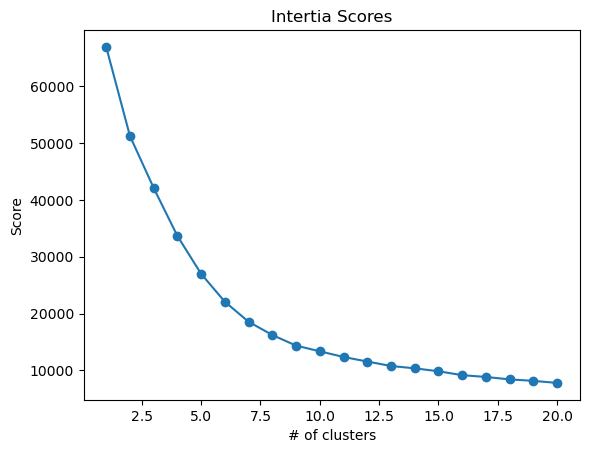

In [165]:
#check inertia scores to find optimal number of clusters
inertia_list = []

for k in range(1,21):
    kmeans = KMeans(n_clusters=k, random_state = 42)
    kmeans.fit(X_num)
    inertia_list.append(kmeans.inertia_)

plt.plot(range(1,21), inertia_list, marker = 'o')
plt.xlabel("# of clusters")
plt.ylabel("Score")
plt.title("Intertia Scores");

Soft elbow appears to be between 5 and 10.

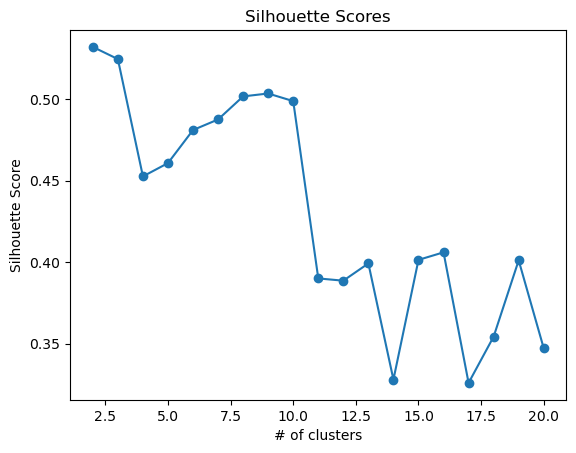

In [166]:
#check silhouette scores to find optimal number of clusters
silhouette_list = []

for k in range(2,21):
    kmeans = KMeans(n_clusters=k,random_state = 42)
    kmeans.fit(X_num)
    silhouette_list.append(silhouette_score(X_num, kmeans.labels_))
    
plt.plot(range(2, 21), silhouette_list, marker = 'o')
plt.xlabel('# of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores');

Silhouette score suggests 9 clusters. 2 or 3 clusters may not be enough to properly separate the data.

In [168]:
silhouette_list

[0.5322277427599589,
 0.5247509027995888,
 0.45267564941592653,
 0.4608558194426233,
 0.4811719321350967,
 0.4876652672288141,
 0.5018341108751407,
 0.5036166424218214,
 0.49892641712455565,
 0.39000393298140484,
 0.3886149231600559,
 0.39922533789904474,
 0.3278516742177532,
 0.40140517281278,
 0.40603292788859924,
 0.3258077346846517,
 0.35424667976594937,
 0.4011209381525167,
 0.3470904713829208]

In [178]:
#Fit clustering algorithm with 8 clusters
kmeans = KMeans(n_clusters=9,random_state = 42)
kmeans.fit(X_num)
X_km = X.copy()
X_km['cluster'] = kmeans.labels_

### KMeans Analysis

In [179]:
#amount of observations in each cluster
X_km['cluster'].value_counts().to_frame('count')

,count
1,4546
2,4208
6,1419
0,517
5,377
3,30
8,25
7,22
4,4


In [186]:
#amount of observations in each cluster
X_km['cluster'].value_counts(normalize=True).to_frame('count')

,count
1,0.407786
2,0.377467
6,0.127287
0,0.046376
5,0.033818
3,0.002691
8,0.002243
7,0.001973
4,0.000359


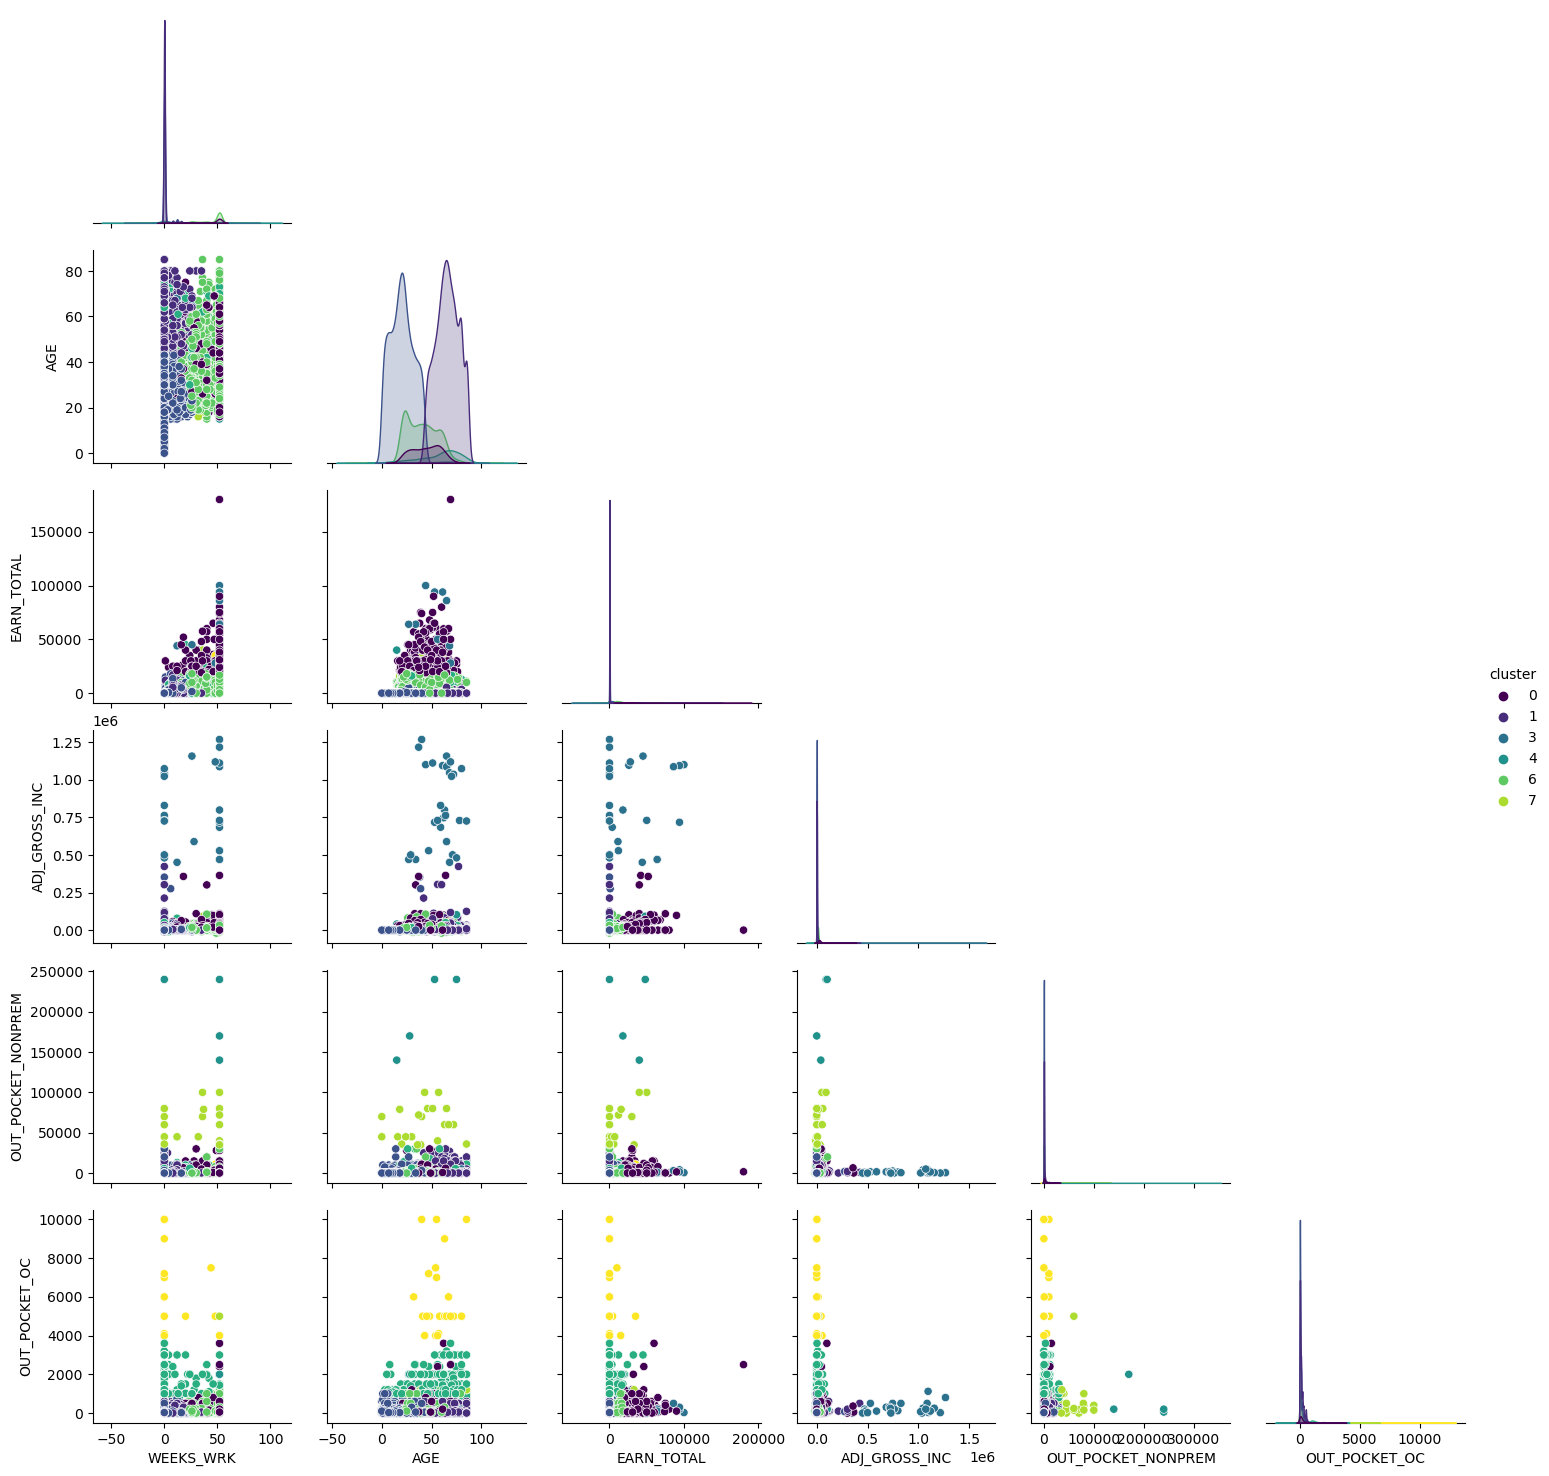

In [182]:
sns.pairplot(data = X_km, hue = 'cluster', corner = True, palette = 'viridis');

Comparison of Cluster Distributions across selected numerical features

In [175]:
X_km.groupby("cluster").agg(['mean', 'median'])

WEEKS_WRK               AGE           EARN_TOTAL           \
              mean median       mean median          mean   median   
cluster                                                              
0        48.088975   52.0  44.313346   45.0  29099.123791  25000.0   
1         0.589309    0.0  65.525077   65.0    139.566652      0.0   
2         1.197006    0.0  20.235979   20.0    379.588165      0.0   
3        28.066667   38.0  59.433333   63.5  24666.866667   1825.0   
4        39.000000   52.0  42.750000   40.5  26500.000000  29000.0   
5         5.193634    0.0  58.437666   63.0   1311.392573      0.0   
6        45.518675   52.0  40.348837   39.0   7497.477801   8000.0   
7        25.863636   34.0  41.090909   39.5   8913.727273      0.0   
8         6.560000    0.0  58.640000   57.0   2568.000000      0.0   

         ADJ_GROSS_INC           OUT_POCKET_NONPREM           OUT_POCKET_OC  \
                  mean    median               mean    median          mean   
cluster                                                                       
0         26394.990329   24000.0        1780.808511     300.0    200.303675   
1          2014.694677       0.0         671.416410      30.0    110.890673   
2           912.375475       0.0         271.985029       0.0     66.799192   
3        837975.666667  780622.5        1069.600000     500.0    229.900000   
4         58580.750000   66000.5      197500.000000  205000.0    612.500000   
5          3998.111406       0.0        2643.132626    1200.0   1380.843501   
6          9513.753347    9294.0         560.981677       0.0    124.915433   
7         15077.045455    1648.5       59454.545455   60000.0    649.772727   
8          5721.480000       0.0        2923.160000     250.0   5952.000000   

                 
         median  
cluster          
0         100.0  
1          50.0  
2          20.0  
3         160.0  
4         200.0  
5        1200.0  
6          50.0  
7         400.0  
8        5000.0

Averages by Cluster

In [176]:
X_km.groupby("cluster").agg(['min', 'max'])

WEEKS_WRK     AGE     EARN_TOTAL         ADJ_GROSS_INC           \
              min max min max        min     max           min      max   
cluster                                                                   
0               1  52  16  76      17000  180000             0   363805   
1               0  35  42  85          0   18000         -9999   423137   
2               0  28   0  44          0   18000         -9999   352215   
3               0  52  27  85          0  100000        450775  1267706   
4               0  52  15  75          0   48000             0   102322   
5               0  52   3  85          0   45000         -9999    78934   
6              14  52  15  85          0   19000        -19935   106032   
7               0  52   0  85          0   50002         -9978    91425   
8               0  52  32  85          0   35000             0    52321   

        OUT_POCKET_NONPREM         OUT_POCKET_OC         
                       min     max           min    max  
cluster                                                  
0                        0   30000             0   3600  
1                        0   30000             0    800  
2                        0   30000             0   1000  
3                        0    5000             0   1122  
4                   140000  240000            50   2000  
5                        0   30000           700   3600  
6                        0   30000             0   1200  
7                    35000  100000             0   5000  
8                        0   11000          4000  10000

Min/Max by Cluster

* Clusters 1,2,5 and 8 have median 0 hours of weeks worked and understandably $0 of ERN_TOTAL and ADJ_GROSS_INC. 
* Individuals in Cluster 4 and 7 easily spend the most for out of pocket non premium medical care whereas individuals in Cluster 8 spend the most on average for out of pocket over the counter care.
* Interestingly, on average individuals in Cluster 1,5,7, and 8 spend more on out of pocket non premium medical care than they make (EARN_TOTAL & ADJ_GROSS_INC). 
* Cluster 2 appears to contain many young people based on max and median age. Similarly, Cluster 1 is composed of older individuals. 
* Wealthiest cluster on average is hard to assess due to due Cluster 3 and Cluster 4 containing 34 people together.
* 

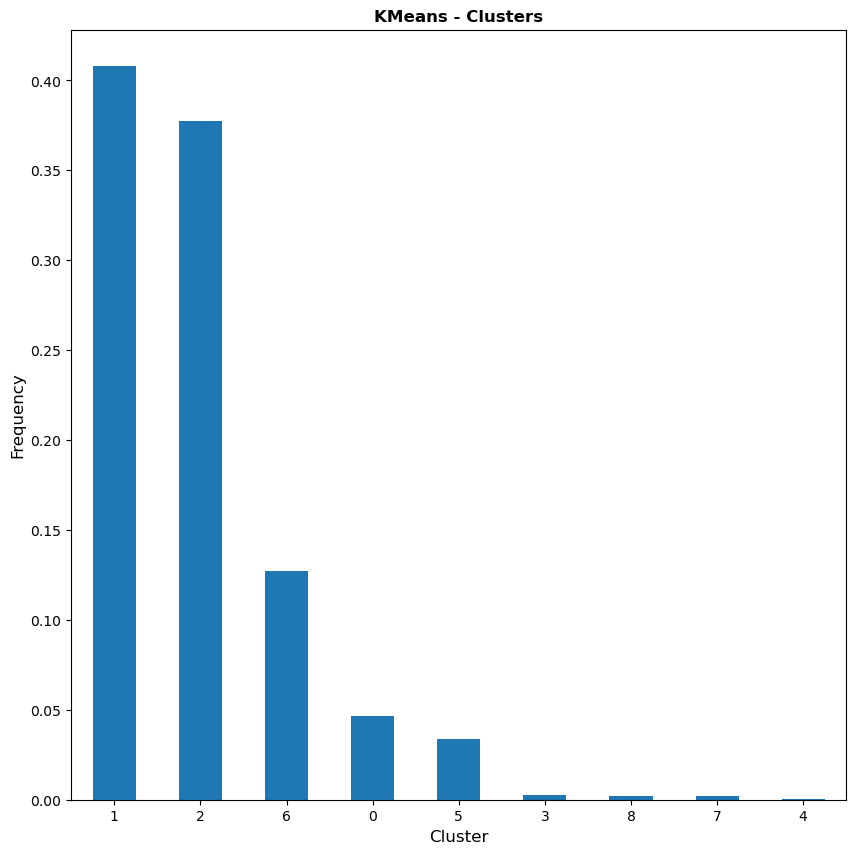

In [185]:
#graphically represent poverty frequency per cluster
cluster_group = X_km['cluster'].value_counts(normalize=True)
cluster_group.plot.bar(figsize = (10,10))
plt.ylabel("Frequency", fontsize = 12)
plt.xlabel("Cluster", fontsize = 12)
plt.xticks(rotation=360)
plt.title("KMeans - Clusters", fontweight = 'bold')
plt.savefig('../images/KMeans_Cluster.png');

Together, Cluster 1 and Cluster 2 contain 8,754 (78%) people in poverty from the dataset. These clusters are the best candidates for further analysis.

### Cluster Comparison

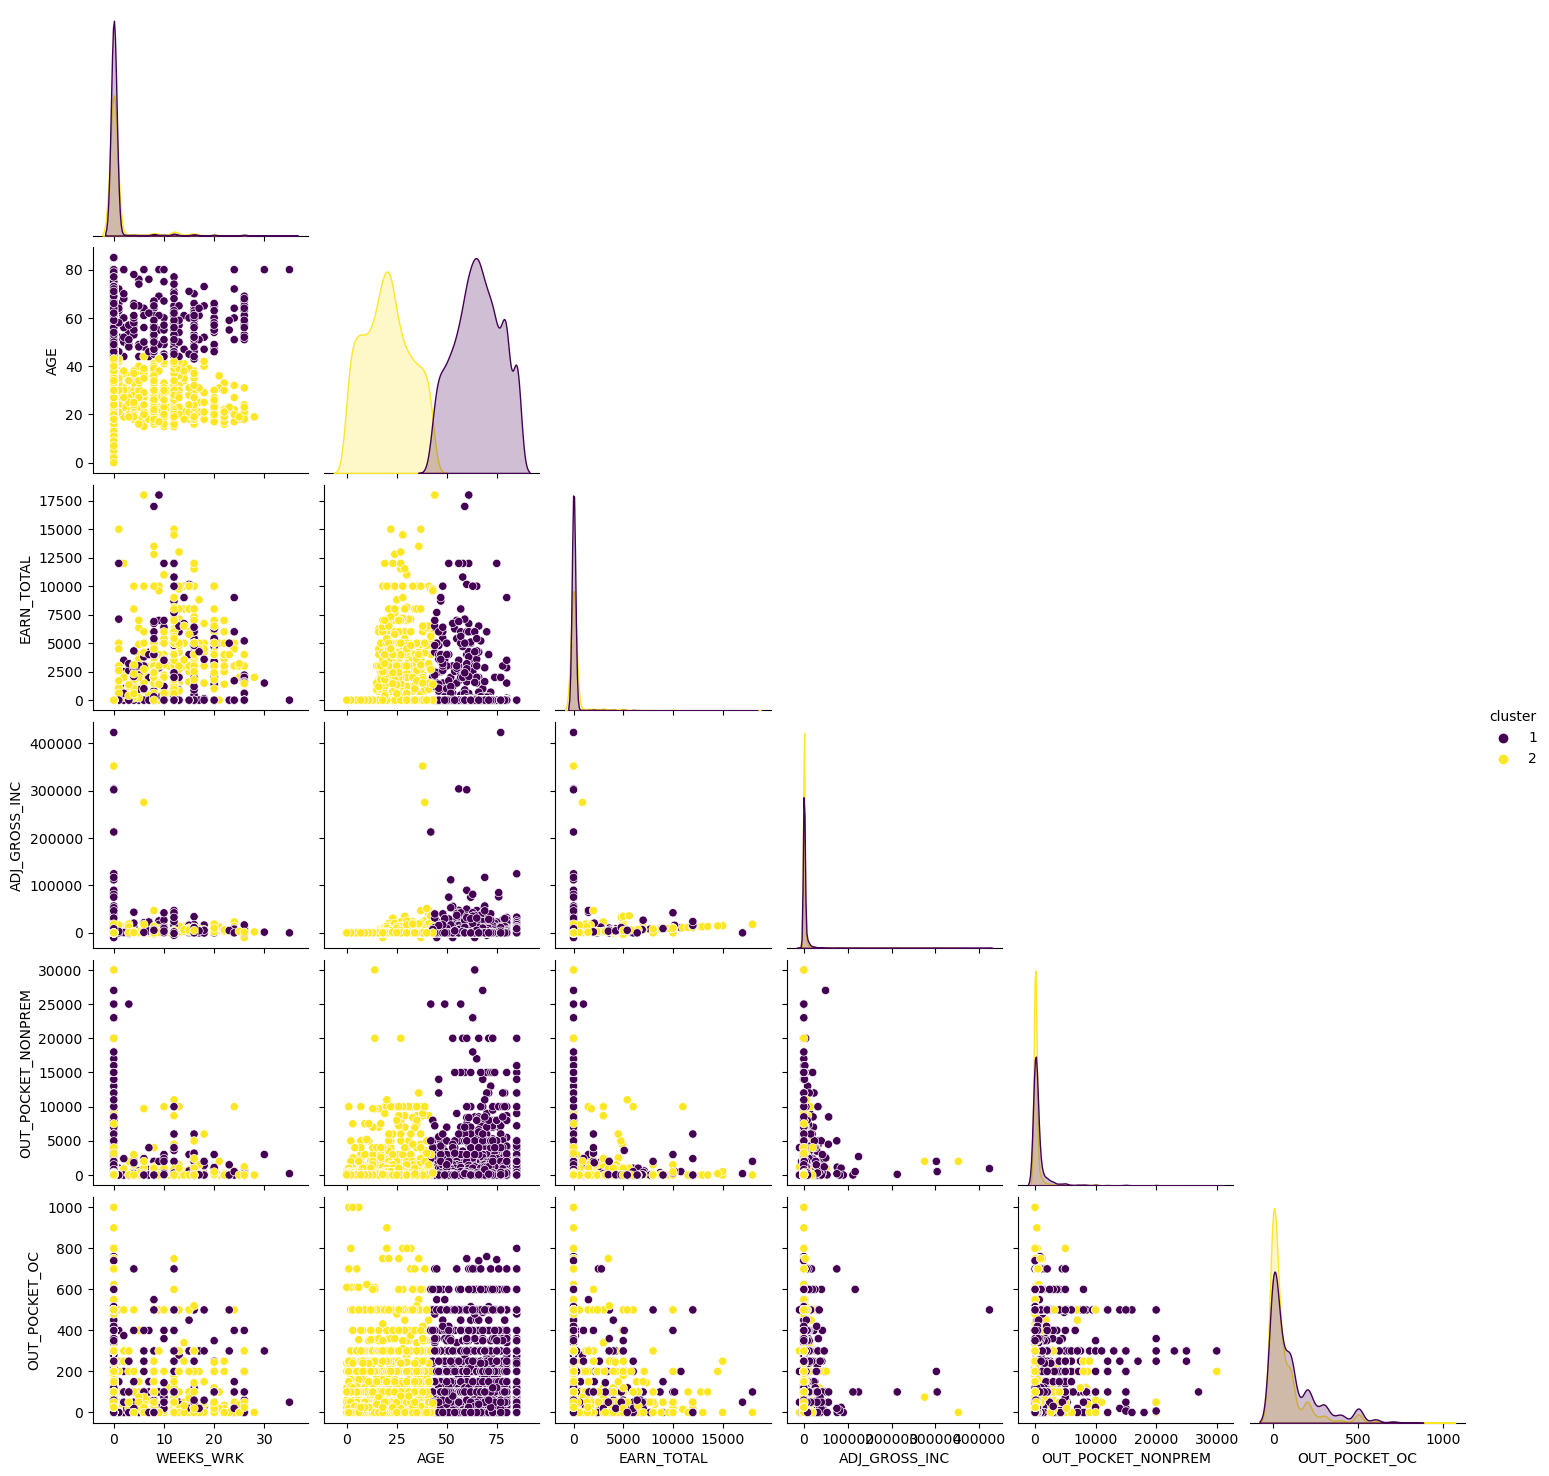

In [189]:
#check distribution comparison of individuals in poverty in CLuster 1 and Cluster 4
sns.pairplot(data = X_km.loc[X_km['cluster'].isin([1,2])],
             hue = 'cluster', corner = True, palette = 'viridis');

Comparison of numerical feature distributions for Cluster 1 & Cluster 2. 

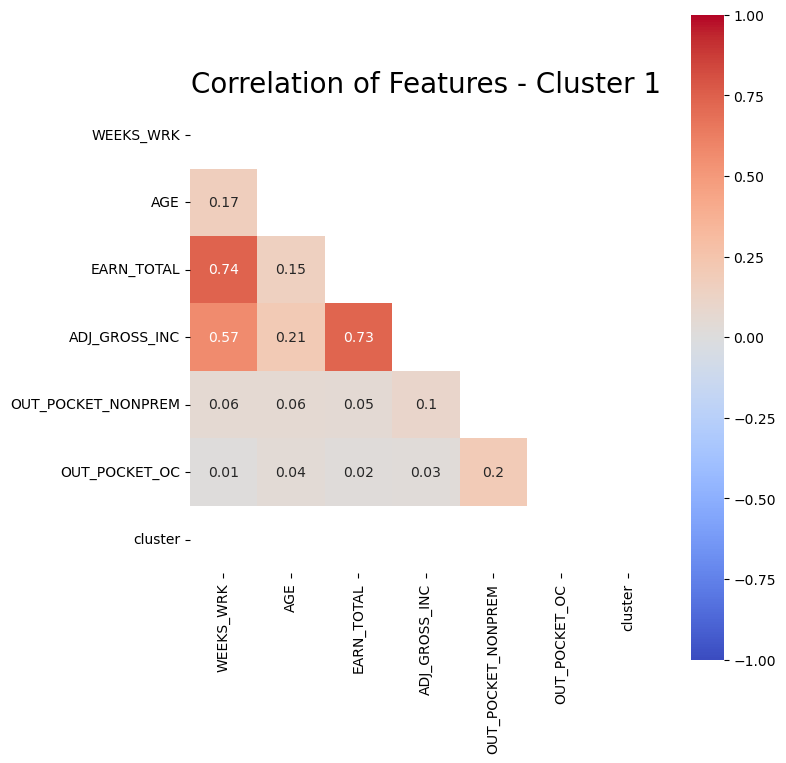

In [63]:
#Plot heatmap presenting correlation of numeric variables
plt.figure(figsize=(8, 8))
plt.title('Correlation of Features - Cluster 1', size=20)
corr = round(X_km.loc[(X_km['cluster'] == 1) &( X_km['POV_STS'] == 'in poverty')].corr(),2)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot = True, cmap = 'coolwarm',mask = mask, square = True,vmin=-1,vmax=1)
plt.tight_layout()
#plt.savefig("../images/correlation_heatmap");

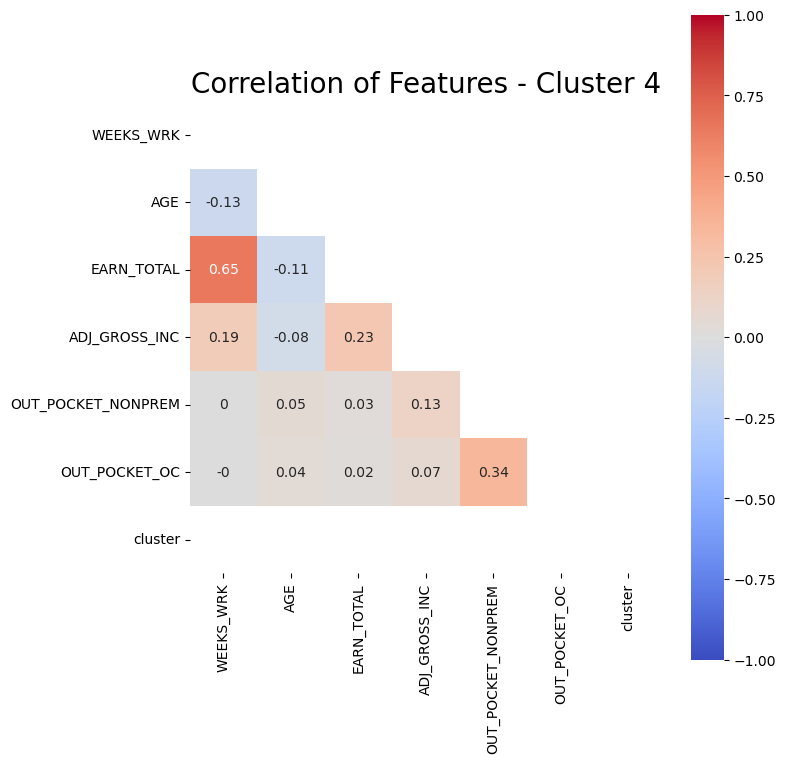

In [64]:
#Plot heatmap presenting correlation of numeric variables
plt.figure(figsize=(8, 8))
plt.title('Correlation of Features - Cluster 4', size=20)
corr = round(X_km.loc[(X_km['cluster'] == 4) &( X_km['POV_STS'] == 'in poverty')].corr(),2)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, annot = True, cmap = 'coolwarm',mask = mask, square = True,vmin=-1,vmax=1)
plt.tight_layout()
#plt.savefig("../images/correlation_heatmap");

* As evidenced above, the greatest difference between these two clusters is age. 
* Distribution shapes of OUT_POCKET_OC, OUT_POCKET_NONPREM, EARN_TOTAL, and WEEKS_WRK are very similar. Older people appear to have greater percentage of non-workers (and by extension non-earners) than younger individuals.
* Considering correlation, the most notable differences are:
> There is a much smaller positive correlation between ADJ_GROSS_INC and EARN_TOTAL in the older cluster than the younger cluster. <br>
> The correlation between OUT_POCKET_NONPREM and OUT_POCKET_OC is slightly higher (more positive) in the older cluster compared to the younger one.

### DBScan

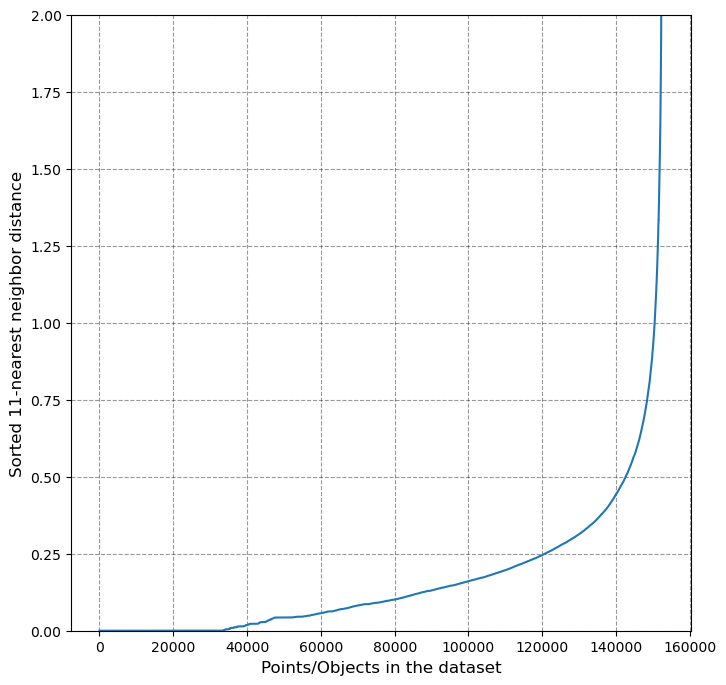

In [83]:
#tips for hyperparemeter tuning of DBScan
#https://stackoverflow.com/questions/15050389/estimating-choosing-optimal-hyperparameters-for-dbscan

#find optimal epsilon
def get_kdist_plot(X, k, radius_nbrs=1.0):

    nbrs = NearestNeighbors(n_neighbors=k, radius=radius_nbrs).fit(X)

    # For each point, compute distances to its k-nearest neighbors
    distances, indices = nbrs.kneighbors(X) 
                                       
    distances = np.sort(distances, axis=0)
    distances = distances[:, k-1]

    # Plot the sorted K-nearest neighbor distance for each point in the dataset
    plt.figure(figsize=(8,8))
    plt.plot(distances)
    plt.xlabel('Points/Objects in the dataset', fontsize=12)
    plt.ylabel('Sorted {}-nearest neighbor distance'.format(k), fontsize=12)
    plt.grid(True, linestyle="--", color='black', alpha=0.4)
    plt.ylim(bottom = 0, top = 2)
    plt.show()


k = 2 * X_num.shape[-1] - 1 
get_kdist_plot(X_num, k)

Optimal epsilon may be between .25 and 1 (greatest curvature)

In [9]:
#search for optimal epsilon and min_samples with silhouette score

eps_list = [.7,.75,.8,.85]
sample_list = [12,14,16,18]

silhouette_list_db = []

for value in eps_list:
    db_dict_silhouette = {}
    for other_value in sample_list:
        db = DBSCAN(eps=value, min_samples=other_value)
        db.fit(X_num)
        db_dict_silhouette[(value,other_value)] = silhouette_score(X_num,db.labels_)
    silhouette_list_db.append(db_dict_silhouette)

In [10]:
silhouette_list_db

[{(0.7, 12): 0.46908763939106923,
  (0.7, 14): 0.5986424454449123,
  (0.7, 16): 0.616944028195341,
  (0.7, 18): 0.5984587158350348},
 {(0.75, 12): 0.6095716109913254,
  (0.75, 14): 0.6002135250220781,
  (0.75, 16): 0.599347099105914,
  (0.75, 18): 0.6103527683405859},
 {(0.8, 12): 0.6674015289893667,
  (0.8, 14): 0.6650177467071503,
  (0.8, 16): 0.6172418882944455,
  (0.8, 18): 0.6173201160708989},
 {(0.85, 12): 0.6735607434976729,
  (0.85, 14): 0.6780408424894757,
  (0.85, 16): 0.6106829179667977,
  (0.85, 18): 0.6175276834554287}]

Epsilon of .85 and 14 minimum samples seems to be optimal.

In [11]:
db = DBSCAN(eps=.85, min_samples=14)
db.fit(X_num)

DBSCAN(eps=0.85, min_samples=14)

In [12]:
X_db = X[X_num.columns].copy()
X_db['cluster'] = db.labels_

### DBScan Analysis

In [13]:
X_db['cluster'].value_counts(normalize=True)

 0    0.983795
-1    0.015111
 4    0.000386
 1    0.000288
 2    0.000249
 3    0.000170
Name: cluster, dtype: float64

* 5 clusters excluding the noise
* Over 98% of data in one cluster
* Only about .1% of data in other 4 clusters

This implementation of DBScan doesn't appear to be ideal in analyzing relationships between numerical features due to 98% of data belinging to one cluster. Analysis of this cluster would be highly similar to general analysis on the entire dataset.

## Categorical Clustering<a id='cc'></a>
---

### KModes

In [ ]:
#pip install --upgrade kmodes
#in terminal
#Source - https://pypi.org/project/kmodes/
'''
k-modes is used for clustering categorical variables.
It defines clusters based on the number of matching categories between data points.
(This is in contrast to the more well-known k-means algorithm, which clusters numerical data based on Euclidean distance.)
The k-prototypes algorithm combines k-modes and k-means and is able to cluster mixed numerical / categorical data.

@Misc{devos2015,
  author = {Nelis J. de Vos},
  title = {kmodes categorical clustering library},
  howpublished = {\url{https://github.com/nicodv/kmodes}},
  year = {2015--2021}
}
'''

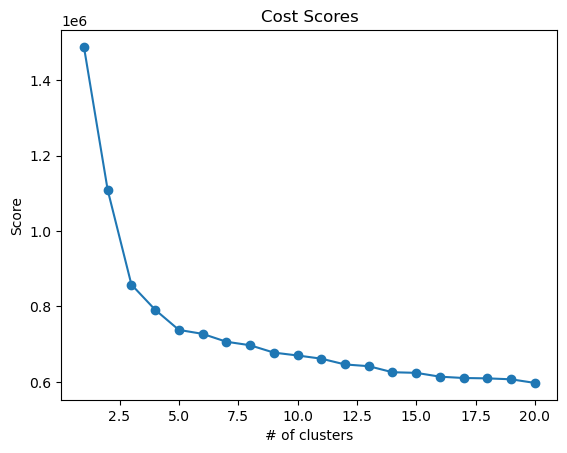

In [136]:
cost_list = []

for k in range(1,21):
    kmodes = KModes(n_clusters=k, random_state = 42)
    kmodes.fit(X_cat)
    cost_list.append(kmodes.cost_)

plt.plot(range(1,21), cost_list, marker = 'o')
plt.xlabel("# of clusters")
plt.ylabel("Score")
plt.title("Cost Scores");

Optimal clusters appears to be 5.

In [67]:
#Fit clustering algorithm with 5 clusters
kmodes = KModes(n_clusters=5, random_state = 42)
kmodes.fit(X_cat)
X_kmodes = X_cat.copy()
X_kmodes['cluster'] = kmodes.labels_

In [68]:
#amount of observations in each cluster
X_kmodes['cluster'].value_counts().to_frame('count')

,count
0,48986
1,32321
2,31848
3,25167
4,14410


In [71]:
#find modes of each feature by cluster
X_kmodes.groupby("cluster").agg(lambda x: x.value_counts().index[0])

,FAM_RELATIONSHIP,OCCUPATION,EDU_LVL,MARITAL,SEX,MILITARY,HISPANIC,IMMIGR_YR,CITIZENSHIP,DISABLED,RACE,WORK_INDUSTRY,LABOR_STATUS,WRK_STATUS,NO_WRK_RSN,FT_PT,EARN_SOURCE,ERN_OTR,WORK_DIS,TAX_FILE_STAT,HEALTH_INS,PUB_INS,PRIV_INS
cluster,,,,,,,,,,,,,,,,,,,,,,,
0,ref person,Professional,bachelor's degree,married/civilian spouse,female,no,no,not immigrant,native,no,White only,"Educational services, and health care and soci...",employed/at work,FT hours,not applicable,ft all year,wage,no,no,joint under 65 y/o,yes,no coverage,covered all year
1,ref person,none,high school graduate,married/civilian spouse,female,no,no,not immigrant,native,no,White only,Not applicable,retired,Not in labor force,retired,nonworker,unemployed,under 15,no,single,yes,covered all year,no coverage
2,child,none,children,single,male,ineligible,no,not immigrant,native,not included,White only,Not applicable,not applicable,Child,not applicable,under 15,unemployed,under 15,under 15,nonfiler,yes,no coverage,covered all year
3,not fam,Service,high school graduate,single,male,no,no,not immigrant,native,no,White only,Wholesale and retail trade,employed/at work,FT hours,not applicable,ft all year,wage,no,no,single,yes,no coverage,covered all year
4,child,none,high school no diploma,single,female,no,no,not immigrant,native,no,White only,Not applicable,not in labor force/other,Not in labor force,going to school,nonworker,unemployed,under 15,no,nonfiler,yes,no coverage,covered all year


**Similarities**
> Non-hispanic, native white individuals are most common in all clusters.<br>
> Majority of people in each cluster do not have a disability preventing work, do not have additional earning sources outside employment, and are not part of the military.<br>
> Most people in all clusters have health insurance.<br>
>Majority of people in Cluster 1,2, and 4 are unemployed. This could be due to old age for Cluster 1 and young age for Clusters 2 and 4. 

**Differences**
> Majority of people in Cluster 1 have public insurance whereas the majority of people in the other clusters have private insurance.<br>
> Clusters 2 and 4 are dominated by children whereas Cluster 0 and Cluster 1 mainly consist of reference persons.<br> 
> Cluster 0 is the only cluster predominantly featuring individuals that attained higher education.<br>
> Most people in Cluster 2,3, and 4 are single whereas those in Clusters 0 and 1 are married. 


In [72]:
#create Kmodes clustering column in dataframe and check amount in poverty per cluster
df['kmodes_cluster'] = kmodes.labels_
print(df.groupby('kmodes_cluster')['POV_STS'].value_counts(normalize=True))
print(df.groupby('kmodes_cluster')['POV_STS'].value_counts())

kmodes_cluster  POV_STS       
0               not in poverty    0.977218
                in poverty        0.022782
1               not in poverty    0.837938
                in poverty        0.162062
2               not in poverty    0.955099
                in poverty        0.044901
3               not in poverty    0.936464
                in poverty        0.063536
4               not in poverty    0.877516
                in poverty        0.122484
Name: POV_STS, dtype: float64
kmodes_cluster  POV_STS       
0               not in poverty    47870
                in poverty         1116
1               not in poverty    27083
                in poverty         5238
2               not in poverty    30418
                in poverty         1430
3               not in poverty    23568
                in poverty         1599
4               not in poverty    12645
                in poverty         1765
Name: POV_STS, dtype: int64


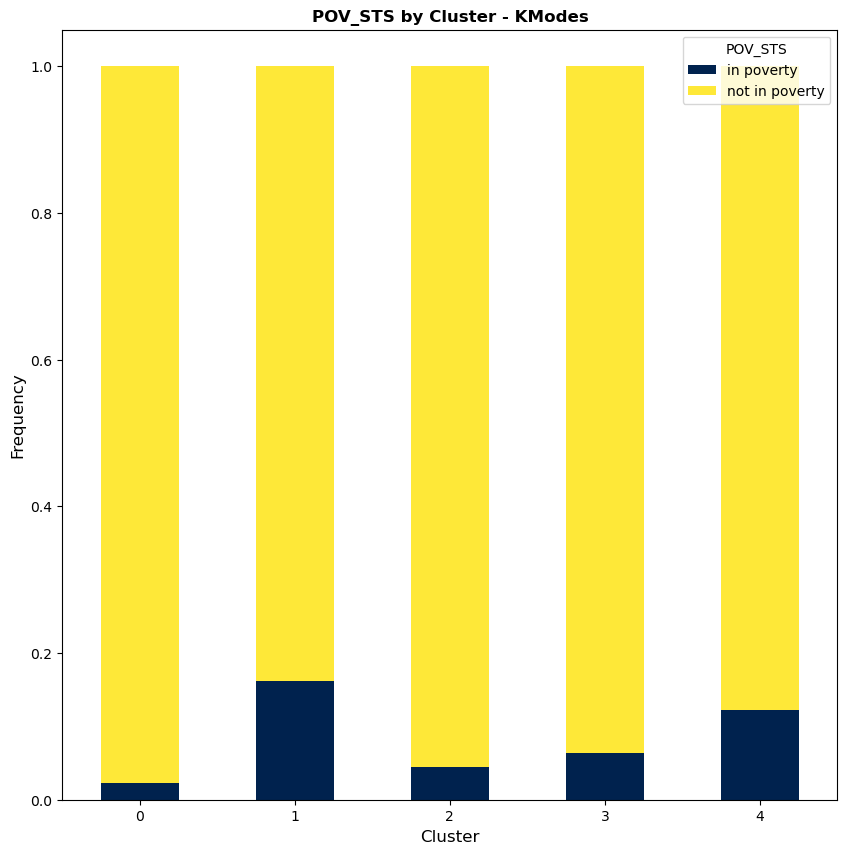

In [112]:
#graphically represent poverty frequency per cluster
cluster_group = df.groupby('kmodes_cluster')['POV_STS'].value_counts(normalize=True)
cluster_group.unstack().plot.bar(stacked=True, figsize = (10,10), colormap = 'cividis')
plt.ylabel("Frequency", fontsize = 12)
plt.xlabel("Cluster", fontsize = 12)
plt.xticks(rotation=360)
plt.title("POV_STS by Cluster - KModes", fontweight = 'bold')
plt.savefig('../images/KModes_Cluster.png');

Majority of people in poverty were assigned to Cluster 1 (47% of people in poverty). The remaining impoverished indivduals are relatively balanced in the remaining clusters. Modes can potentially be misleading due to inclusion of all people in clusters so further analysis is required.

### Cluster 1 Analysis

In [ ]:
plot_list = ["OCCUPATION", 'EDU_LVL', 'MARITAL', 'DISABLED', 'SEX', 'CITIZENSHIP', 
            'RACE', 'LABOR_STATUS', 'HEALTH_INS', 'PUB_INS', 'PRIV_INS','FAM_RELATIONSHIP',
            'WORK_INDUSTRY', 'NO_WRK_RSN', 'DIS_INC', 'TAX_FILE_STAT']

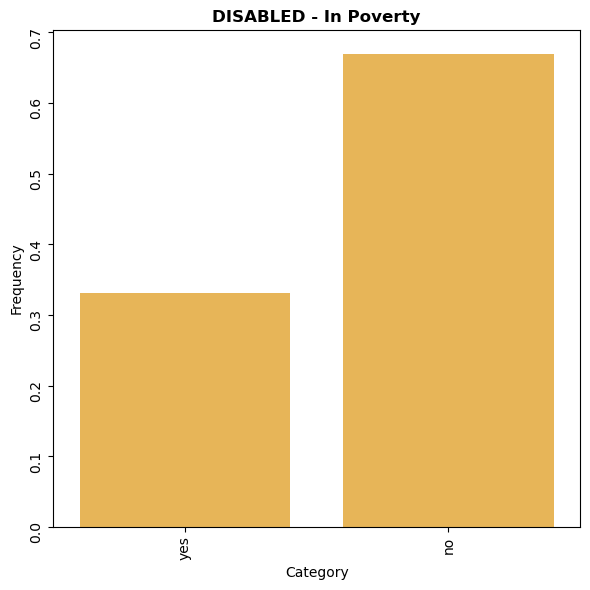

In [86]:
custom_frequency_plot(1, 'DISABLED')

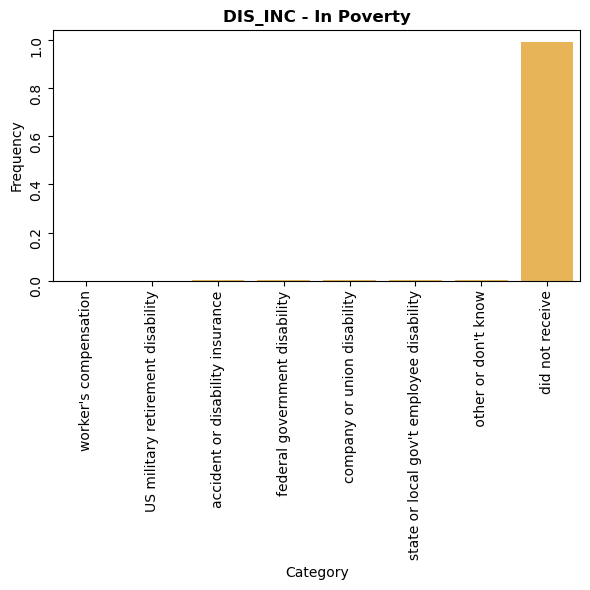

In [93]:
custom_frequency_plot(1, 'DIS_INC')

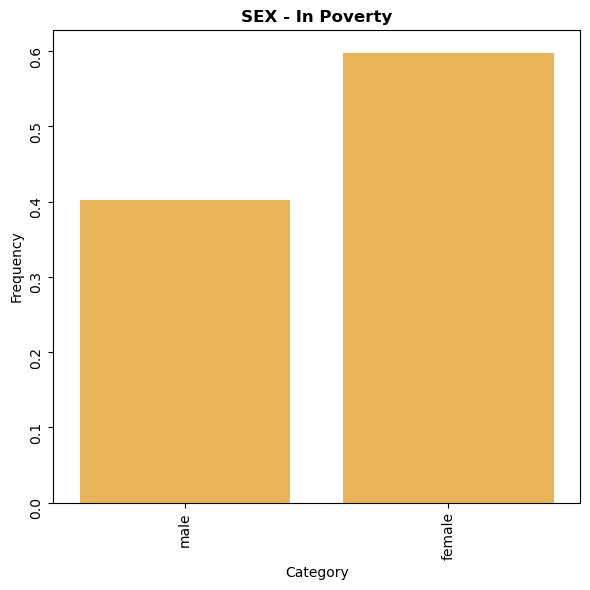

In [87]:
custom_frequency_plot(1, 'SEX')

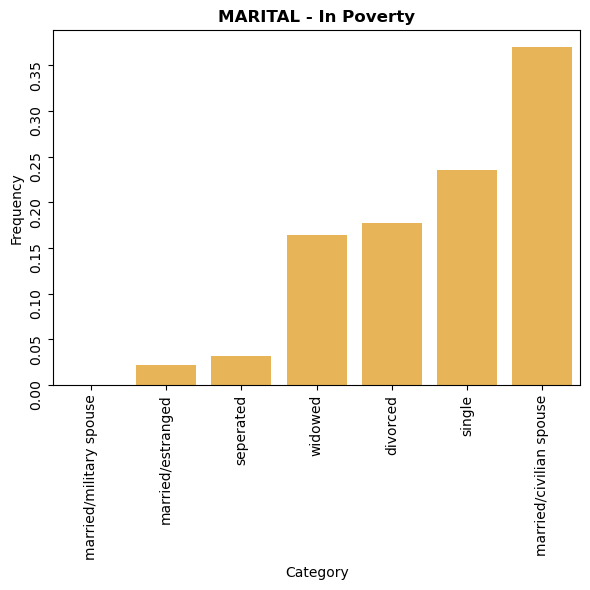

In [88]:
custom_frequency_plot(1, 'MARITAL')

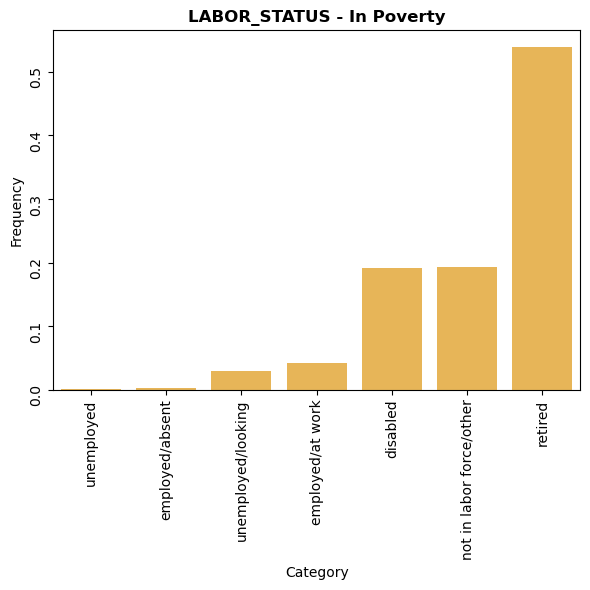

In [89]:
custom_frequency_plot(1, 'LABOR_STATUS')

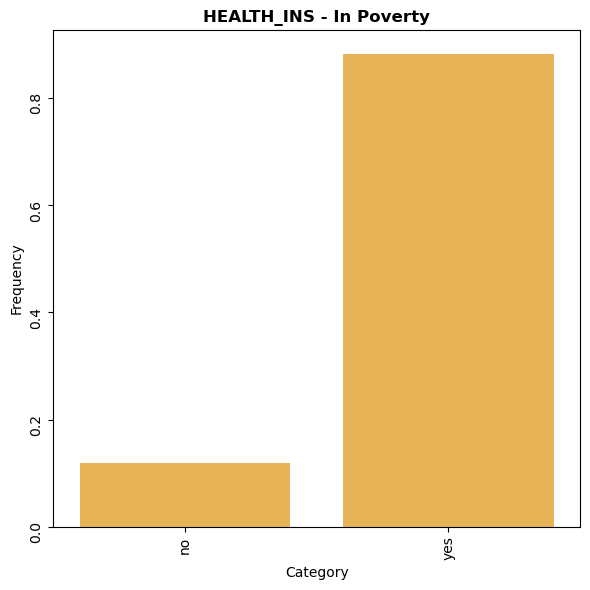

In [90]:
custom_frequency_plot(1, 'HEALTH_INS')

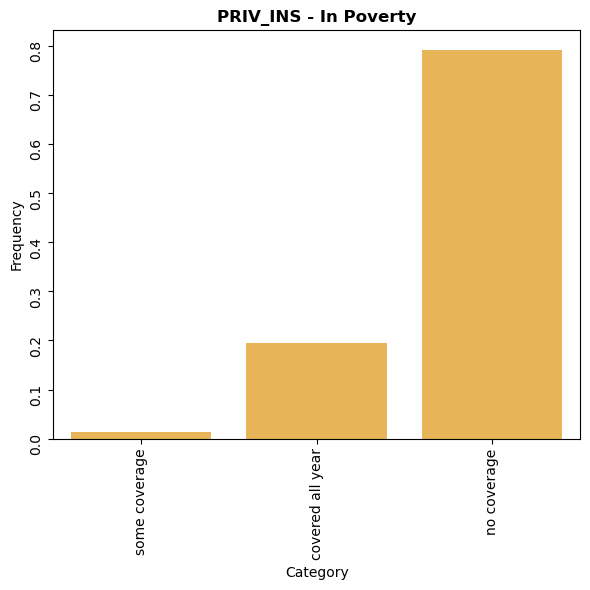

In [91]:
custom_frequency_plot(1, 'PRIV_INS')

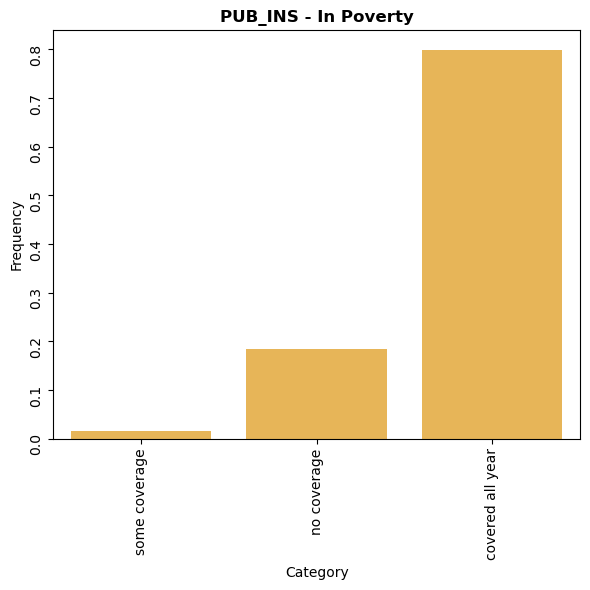

In [94]:
custom_frequency_plot(1, 'PUB_INS')

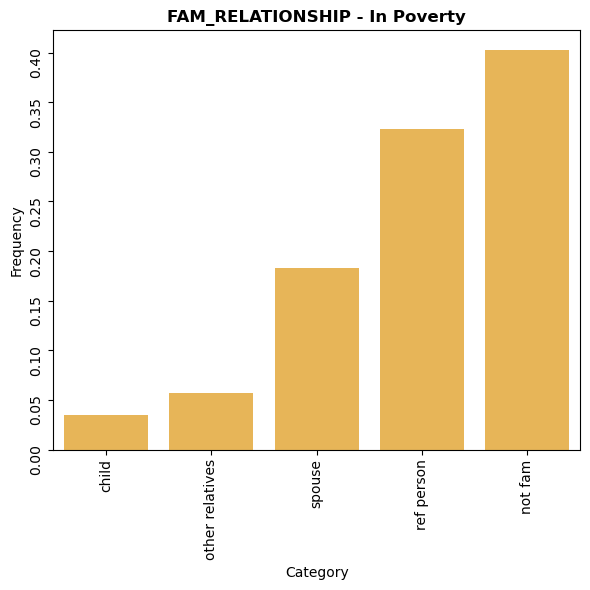

In [92]:
custom_frequency_plot(1, 'FAM_RELATIONSHIP')

### Part 2

In [132]:
X_cat = X_cat.loc[X_cat["POV_STS"] == 'in poverty']

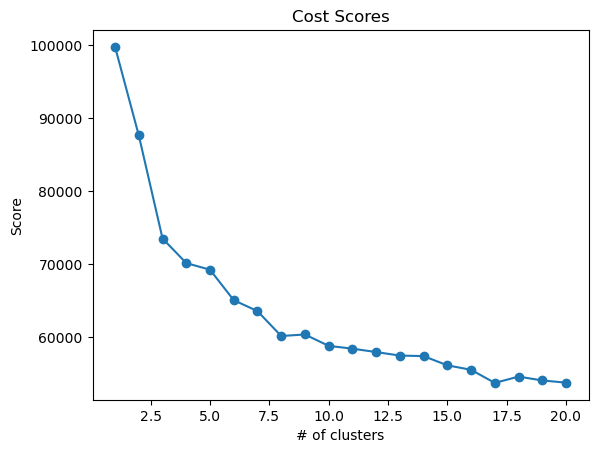

In [126]:
cost_list2 = []

for k in range(1,21):
    kmodes = KModes(n_clusters=k, random_state = 42, n_jobs = -1)
    kmodes.fit(X_cat)
    cost_list2.append(kmodes.cost_)

plt.plot(range(1,21), cost_list2, marker = 'o')
plt.xlabel("# of clusters")
plt.ylabel("Score")
plt.title("Cost Scores");

8 clusters appears to be ideal.

In [135]:
#Fit clustering algorithm with 8 clusters
kmodes = KModes(n_clusters=8, random_state = 42, n_jobs=-1)
kmodes.fit(X_cat)
X_kmodes = X_cat.copy()
X_kmodes['cluster'] = kmodes.labels_

In [138]:
#amount of observations in each cluster
X_kmodes['cluster'].value_counts().to_frame('count')

,count
0,3496
1,1621
2,1423
5,1410
7,1207
3,856
6,648
4,487


In [139]:
#find modes of each feature by cluster
X_kmodes.groupby("cluster").agg(lambda x: x.value_counts().index[0])

,FAM_RELATIONSHIP,OCCUPATION,EDU_LVL,MARITAL,SEX,MILITARY,HISPANIC,IMMIGR_YR,CITIZENSHIP,DISABLED,RACE,WORK_INDUSTRY,LABOR_STATUS,WRK_STATUS,NO_WRK_RSN,FT_PT,EARN_SOURCE,ERN_OTR,WORK_DIS,TAX_FILE_STAT,HEALTH_INS,PUB_INS,PRIV_INS,POV_STS
cluster,,,,,,,,,,,,,,,,,,,,,,,,
0,not fam,none,high school graduate,married/civilian spouse,female,no,no,not immigrant,native,no,White only,Not applicable,retired,Not in labor force,retired,nonworker,unemployed,under 15,no,single,yes,covered all year,no coverage,in poverty
1,not fam,Service,high school graduate,single,male,no,no,not immigrant,native,no,White only,"Educational services, and health care and soci...",employed/at work,FT hours,not applicable,ft all year,wage,no,no,single,yes,no coverage,covered all year,in poverty
2,child,none,children,single,male,ineligible,no,not immigrant,native,not included,White only,Not applicable,not applicable,Child,not applicable,under 15,unemployed,under 15,under 15,nonfiler,yes,covered all year,no coverage,in poverty
3,ref person,none,high school graduate,married/civilian spouse,female,no,yes,2010s,non citizen,no,White only,Not applicable,not in labor force/other,Not in labor force,taking care of home,nonworker,unemployed,under 15,no,joint under 65 y/o,yes,no coverage,no coverage,in poverty
4,not fam,none,high school graduate,single,male,no,no,not immigrant,native,no,White only,Not applicable,not in labor force/other,Not in labor force,not applicable,ft part year,wage,no,no,single,no,no coverage,no coverage,in poverty
5,child,none,high school no diploma,single,male,no,no,not immigrant,native,no,White only,Not applicable,not in labor force/other,Not in labor force,going to school,nonworker,unemployed,under 15,no,nonfiler,yes,no coverage,no coverage,in poverty
6,ref person,Service,high school graduate,single,female,no,yes,2000s,non citizen,no,White only,"Arts, entertainment, recreation and accomodati...",employed/at work,FT hours,not applicable,ft all year,wage,no,no,single,yes,no coverage,no coverage,in poverty
7,not fam,none,high school graduate,single,male,no,no,not immigrant,native,yes,White only,Not applicable,disabled,Not in labor force,ill or disabled,nonworker,unemployed,under 15,yes,single,yes,covered all year,no coverage,in poverty


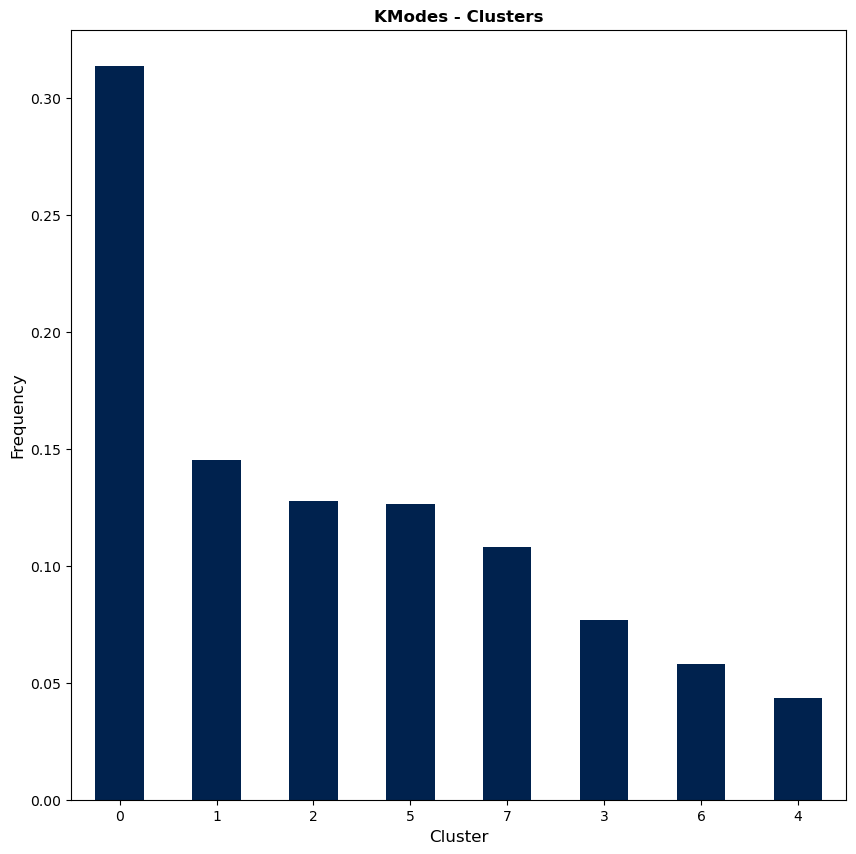

In [187]:
#graphically represent poverty class frequency per cluster
cluster_group = X_kmodes['cluster'].value_counts(normalize=True)
cluster_group.plot.bar(figsize = (10,10), colormap = 'cividis')
plt.ylabel("Frequency", fontsize = 12)
plt.xlabel("Cluster", fontsize = 12)
plt.xticks(rotation=360)
plt.title("KModes - Clusters", fontweight = 'bold')
plt.savefig('../images/KModes_Cluster.png');

## Mixed Clustering
---

### K-Prototype [TBD]

In [141]:
X_mixed = df[['FAM_RELATIONSHIP', 'OCCUPATION', 'EDU_LVL', 'MARITAL', 'SEX', 'MILITARY', 'HISPANIC',
                 'IMMIGR_YR', 'CITIZENSHIP', 'DISABLED','RACE', 'WORK_INDUSTRY', 'LABOR_STATUS', 'WRK_STATUS',
                 'NO_WRK_RSN','FT_PT', 'EARN_SOURCE', 'ERN_OTR', 'WORK_DIS', 'TAX_FILE_STAT','HEALTH_INS',
                 'PUB_INS', 'PRIV_INS', 'WEEKS_WRK', 'AGE', 'EARN_TOTAL', 'ADJ_GROSS_INC','OUT_POCKET_NONPREM',
                 'OUT_POCKET_OC']]

In [142]:
cat_pos = [X_mixed.columns.get_loc(col) for col in list(X_mixed.select_dtypes('object').columns)]

In [ ]:
cost_list = []

for k in range(1,21):
    kproto = KPrototypes(n_clusters=k, random_state = 42)
    kproto.fit(X_mixed,categorical = cat_pos)
    cost_list.append(kproto.cost_)

plt.plot(range(1,21), cost_list, marker = 'o')
plt.xlabel("# of clusters")
plt.ylabel("Score")
plt.title("Cost Scores");

## Conclusion<a id='c'></a>

**KMeans**

> * Income/Earnings and Medical Expenses seem to influence poverty status.
> * Older people may find it more difficult to maintain a constant income stream.

**KModes**

**Concerns**
> * 